## 1. Meet Dr. Ignaz Semmelweis
<p><img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/img/ignaz_semmelweis_1860.jpeg"></p>
<!--
<img style="float: left;margin:5px 20px 5px 1px" src="https://assets.datacamp.com/production/project_20/datasets/ignaz_semmelweis_1860.jpeg">
-->
<p>This is Dr. Ignaz Semmelweis, a Hungarian physician born in 1818 and active at the Vienna General Hospital. If Dr. Semmelweis looks troubled it's probably because he's thinking about <em>childbed fever</em>: A deadly disease affecting women that just have given birth. He is thinking about it because in the early 1840s at the Vienna General Hospital as many as 10% of the women giving birth die from it. He is thinking about it because he knows the cause of childbed fever: It's the contaminated hands of the doctors delivering the babies. And they won't listen to him and <em>wash their hands</em>!</p>
<p>In this notebook, we're going to reanalyze the data that made Semmelweis discover the importance of <em>handwashing</em>. Let's start by looking at the data that made Semmelweis realize that something was wrong with the procedures at Vienna General Hospital.</p>

Let's prepare our working environment by **importing the relevant modules**:

In [1]:
# Importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's ingest our dataset.

In [2]:
# Read dataset
yearly = pd.read_csv('datasets/yearly_deaths_by_clinic.csv')
yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


The dataset **is quite compact**. It is also **well-structured**, without `null` values. Let's confirm that **each column has an appropriate data type**:

In [3]:
yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
year      12 non-null int64
births    12 non-null int64
deaths    12 non-null int64
clinic    12 non-null object
dtypes: int64(3), object(1)
memory usage: 464.0+ bytes


**Yes, data types are appropriate**. Let's check unique values, to confirm values are also appropriate:

In [4]:
yearly.nunique()

year       6
births    12
deaths    12
clinic     2
dtype: int64

The dataset contains **information over 6 different years, for 2 different clinics**. Let's **transform the structure** of the dataframe `yearly` a little, by defining `year` as its `Index`, and by reordering columns:

In [5]:
yearly.set_index('year', inplace=True)
yearly.sort_index(inplace=True)
yearly = yearly.loc[:, ['clinic', 'births', 'deaths']]
yearly

,clinic,births,deaths
year,,,
1841,clinic 1,3036,237
1841,clinic 2,2442,86
1842,clinic 1,3287,518
1842,clinic 2,2659,202
1843,clinic 1,3060,274
1843,clinic 2,2739,164
1844,clinic 1,3157,260
1844,clinic 2,2956,68
1845,clinic 1,3492,241


## 2. The alarming number of deaths
<p>The table above shows the number of women giving birth at the two clinics at the Vienna General Hospital for the years 1841 to 1846. You'll notice that giving birth was very dangerous; an <em>alarming</em> number of women died as the result of childbirth, most of them from childbed fever.</p>
<p>We see this more clearly if we look at the <em>proportion of deaths</em> out of the number of women giving birth. Let's zoom in on the proportion of deaths at Clinic 1.</p>

In [6]:
# Calculate proportion of deaths per no. births
yearly['proportion_deaths'] = yearly['deaths'] / yearly['births']
yearly[yearly['clinic'] == 'clinic 1']

,clinic,births,deaths,proportion_deaths
year,,,,
1841,clinic 1,3036,237,0.078063
1842,clinic 1,3287,518,0.157591
1843,clinic 1,3060,274,0.089542
1844,clinic 1,3157,260,0.082357
1845,clinic 1,3492,241,0.069015
1846,clinic 1,4010,459,0.114464


## 3. Death at the clinics
<p>If we now plot the proportion of deaths at both clinic 1 and clinic 2  we'll see a curious pattern...</p>

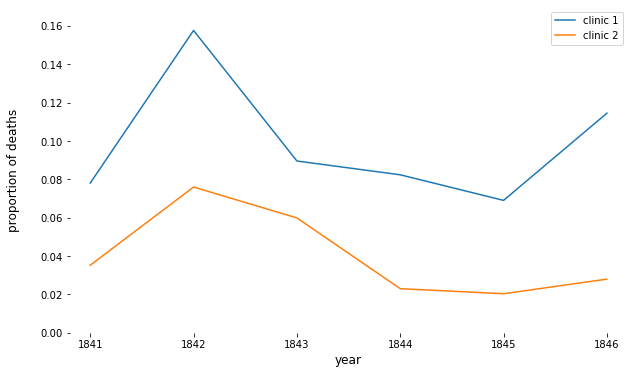

In [7]:
# Plot yearly proportion of deaths at the two clinics
yearly.groupby('clinic')['proportion_deaths'].plot(legend=True, figsize=(10, 6))
plt.xlim((1840.8, 1846.2))
plt.ylim((0, 0.17))
plt.xlabel('year', fontsize='large')
plt.ylabel('proportion of deaths', labelpad=20, fontsize='large')
plt.box(False)
plt.show()

The graph clearly shows that `clinic 1` **presents a higher proportion of deaths**, across all years.

## 4. The handwashing begins
<p>Why is the proportion of deaths constantly so much higher in Clinic 1? Semmelweis saw the same pattern and was puzzled and distressed. The only difference between the clinics was that many medical students served at Clinic 1, while mostly midwife students served at Clinic 2. While the midwives only tended to the women giving birth, the medical students also spent time in the autopsy rooms examining corpses. </p>
<p>Semmelweis started to suspect that something on the corpses, spread from the hands of the medical students, caused childbed fever. So in a desperate attempt to stop the high mortality rates, he decreed: <em>Wash your hands!</em> This was an unorthodox and controversial request, nobody in Vienna knew about bacteria at this point in time. </p>
<p>Let's load in monthly data from Clinic 1 to see if the handwashing had any effect.</p>

In [8]:
# Read dataset
monthly = pd.read_csv('datasets/monthly_deaths.csv', parse_dates=['date'])
monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


Let's examine **data structure**:

In [9]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
date      98 non-null datetime64[ns]
births    98 non-null int64
deaths    98 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


Data is **well-structured**, without `null` values and with appropriate data types. Let's evaluate the syntatic and semantic value of the columns, by looking at the number of unique values in each of them, as well as their brief statistical description:

In [10]:
monthly.nunique()

date      98
births    73
deaths    47
dtype: int64

In [11]:
monthly.describe()

,births,deaths
count,98.000000,98.000000
mean,267.000000,22.469388
std,41.769372,18.141031
min,190.000000,0.000000
25%,242.500000,8.000000
50%,264.000000,16.500000
75%,292.750000,36.750000
max,406.000000,75.000000


Everything looks fine with data regarding `births` and `deaths`. Let's make sure that `date` has no relevant gaps:

In [12]:
range_months = pd.date_range(monthly['date'].min(), monthly['date'].max(), freq='M')
print('The number of missing months is: {} months'.format(monthly['date'].nunique() - len(range_months)))

The number of missing months is: 0 months


There is no missing month in the dataset. So, let's set `date` as the `monthly` dataframe `Index`:

In [13]:
monthly.set_index('date', inplace=True)
monthly.head()

,births,deaths
date,,
1841-01-01,254,37
1841-02-01,239,18
1841-03-01,277,12
1841-04-01,255,4
1841-05-01,255,2


As we have done with yearly data, let's **calculate the proportion of deaths** in Clinic 1:

In [14]:
# Calculate proportion of deaths per no. births
monthly['proportion_deaths'] = monthly['deaths'] / monthly['births']
monthly.head()

,births,deaths,proportion_deaths
date,,,
1841-01-01,254,37,0.145669
1841-02-01,239,18,0.075314
1841-03-01,277,12,0.043321
1841-04-01,255,4,0.015686
1841-05-01,255,2,0.007843


## 5. The effect of handwashing
<p>With the data loaded we can now look at the proportion of deaths over time. In the plot below we haven't marked where obligatory handwashing started, but it reduced the proportion of deaths to such a degree that you should be able to spot it!</p>

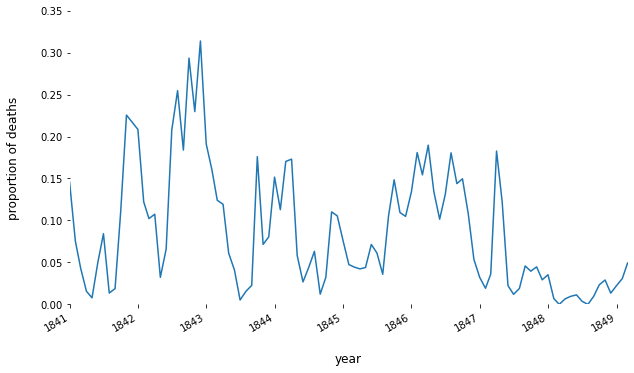

In [15]:
# Plot monthly proportion of deaths
monthly['proportion_deaths'].plot(figsize=(10, 6))
plt.xlabel('year', labelpad=20, fontsize='large')
plt.ylabel('proportion of deaths', labelpad=20, fontsize='large')
plt.ylim((0.0, 0.35))
plt.box(False)
plt.show()

## 6. The effect of handwashing highlighted
<p>Starting from the summer of 1847 the proportion of deaths is drastically reduced and, yes, this was when Semmelweis made handwashing obligatory. </p>
<p>The effect of handwashing is made even more clear if we highlight this in the graph.</p>

To graph the difference between mortality proportions, let's create a new variable that register if a given proportion was from a period **before** or **after handwashing**:

In [16]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

# Create a new field to store if a row represents data before or after handwashing
monthly['period'] = np.where(monthly.index < handwashing_start, 'Before', 'After')
monthly.head()

,births,deaths,proportion_deaths,period
date,,,,
1841-01-01,254,37,0.145669,Before
1841-02-01,239,18,0.075314,Before
1841-03-01,277,12,0.043321,Before
1841-04-01,255,4,0.015686,Before
1841-05-01,255,2,0.007843,Before


Let's convert the newly created column to the `category` data type:

In [17]:
monthly['period'] = pd.Categorical(monthly['period'],
                                   categories=['Before', 'After'],
                                   ordered=True)
monthly['period'].head()

date
1841-01-01    Before
1841-02-01    Before
1841-03-01    Before
1841-04-01    Before
1841-05-01    Before
Name: period, dtype: category
Categories (2, object): [Before < After]

Now we can graph the proportions of deaths in a more informative way:

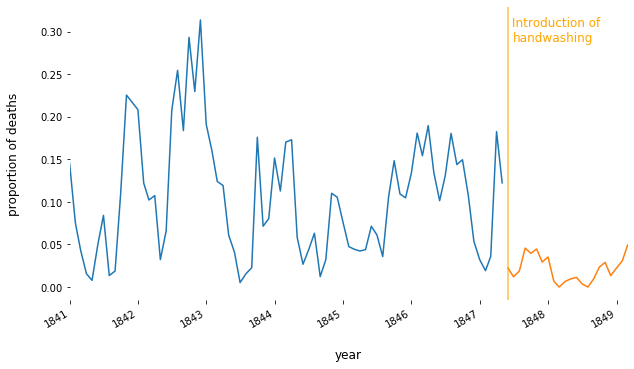

In [18]:
monthly.groupby('period')['proportion_deaths'].plot(figsize=(10, 6))
plt.xlabel('year', labelpad=20, fontsize='large')
plt.ylabel('proportion of deaths', labelpad=20, fontsize='large')
plt.axvline(x=handwashing_start, color='orange', alpha=0.7)
plt.figtext(0.74, 0.80, 'Introduction of\nhandwashing', fontsize=12, color='orange')
plt.box(False)
plt.show()

## 7. More handwashing, fewer deaths?
<p>Again, the graph shows that handwashing had a huge effect. How much did it reduce the monthly proportion of deaths on average?</p>

In [19]:
monthly.groupby('period')['proportion_deaths'].mean().diff()

period
Before         NaN
After    -0.083957
Name: proportion_deaths, dtype: float64

**The mean proportion of deaths was reduced by more than 8.3% percentual points!**

## 8. A Bootstrap analysis of Semmelweis handwashing data
<p>It reduced the proportion of deaths by around 8 percentage points! From 10% on average to just 2% (which is still a high number by modern standards). </p>
<p>To get a feeling for the uncertainty around how much handwashing reduces mortalities we could look at a confidence interval (here calculated using the bootstrap method).</p>

In [20]:
# Creates 2 Series with the death proportion before and after handwashing
before_proportion = monthly[monthly['period'] == 'Before']['proportion_deaths']
after_proportion = monthly[monthly['period'] == 'After']['proportion_deaths']

# A bootstrap analysis of the reduction of deaths due to handwashing
boot_mean_diff = []
for i in range(3000):
    boot_before = before_proportion.sample(frac=1, replace=True)
    boot_after = after_proportion.sample(frac=1, replace=True)
    boot_mean_diff.append(boot_before.mean() - boot_after.mean())

# Calculating a 95% confidence interval from boot_mean_diff 
confidence_interval = pd.Series(boot_mean_diff).quantile([0.025, 0.975])
confidence_interval

0.025    0.067029
0.975    0.102233
dtype: float64

The bootstrap analysis indicates that the 95% confidence interval is situated between ~6.7% and 10.0%. Let's take a look at the sampling distribution of the 3,000 simulations we did in this analysis:

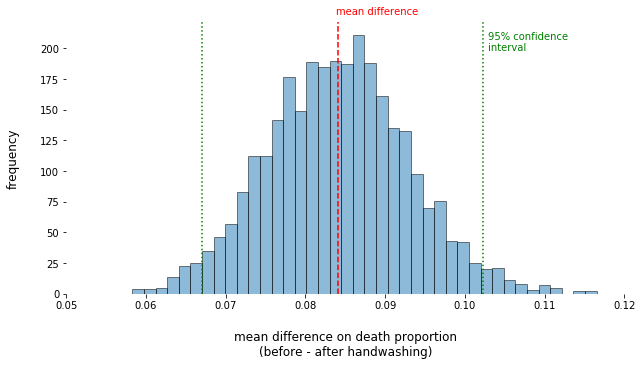

In [21]:
pd.Series(boot_mean_diff).plot(kind='hist', bins=40, alpha=0.5, edgecolor='black', figsize=(10, 5))
plt.xlim((0.05, 0.12))
plt.xlabel('mean difference on death proportion\n(before - after handwashing)',
           labelpad=20,
           fontsize='large')
plt.ylabel('frequency', labelpad=20, fontsize='large')
plt.axvline(x=[np.mean(boot_mean_diff)], color='red', linestyle='--')
plt.axvline(x=confidence_interval[0.025], color='green', linestyle=':')
plt.axvline(x=confidence_interval[0.975], color='green', linestyle=':')
plt.figtext(0.50, 0.90, 'mean difference', color='red')
plt.figtext(0.71, 0.80, '95% confidence\ninterval', color='green')
plt.box(False)
plt.show()

## 9. The fate of Dr. Semmelweis
<p>So handwashing reduced the proportion of deaths by between 6.7 and 10 percentage points, according to a 95% confidence interval. All in all, it would seem that Semmelweis had solid evidence that handwashing was a simple but highly effective procedure that could save many lives.</p>
<p>The tragedy is that, despite the evidence, Semmelweis' theory — that childbed fever was caused by some "substance" (what we today know as <em>bacteria</em>) from autopsy room corpses — was ridiculed by contemporary scientists. The medical community largely rejected his discovery and in 1849 he was forced to leave the Vienna General Hospital for good.</p>
<p>One reason for this was that statistics and statistical arguments were uncommon in medical science in the 1800s. Semmelweis only published his data as long tables of raw data, but he didn't show any graphs nor confidence intervals. If he would have had access to the analysis we've just put together he might have been more successful in getting the Viennese doctors to wash their hands.</p>

In [22]:
# The data Semmelweis collected points to that:
doctors_should_wash_their_hands = True